# Visualization of CO2 emissions per country, comparing it to their GDP

This notebook explores the relationship between a country's Gross Domestic Product (GDP) and its CO₂ emissions. By visualizing emissions data alongside economic output, we aim to understand:
    - Which countries emit the most CO2
    - How emissions change with GDP
    - If richer countries are always the bigger polluters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

### Preparing data
The main dataset used in this notebook is co2-emissions-vs-gdp.csv. The dataset co2_vs_gdp includes Country name, Year, Annual CO2 emissions per capita, GDP per capita, population (and other) per year (latest year is 2023).

In [2]:
data_root = './data/'
data_root_world = './data/cultural/'

In [3]:
df_gdp = pd.read_csv(f'{data_root}co2-emissions-vs-gdp.csv')
df_co2 = pd.read_csv(f'{data_root}co2_emmisions_complicated.csv')

world = gpd.read_file(f'{data_root_world}ne_110m_admin_0_countries.shp')

The datasets include information on the whole world, which is a lot of data. We decided to narrow it down to only European countries as it's more manageable and easier for the viewer.

In [4]:
# Filtering the data only for European countries
df_co2_europe = df_co2[df_co2['Region'].str.contains('Europe', case=False, na=False)]

# Add Russia
df_russia = df_co2[df_co2['Name'].str.contains('Russian Federation', case=False, na=False)].copy()
df_russia['Name'] = df_russia['Name'].replace('Russian Federation', 'Russia')

# Add Ukraine
df_ukraine = df_co2[df_co2['Name'].str.contains('Ukraine', case=False, na=False)].copy()

# Add Belarus
df_belarus = df_co2[df_co2['Name'].str.contains('Belarus', case=False, na=False)].copy()

# Add Moldova
df_moldova = df_co2[df_co2['Name'].str.contains('Moldova', case=False, na=False)].copy()
df_moldova['Name'] = df_moldova['Name'].replace('Moldova, Republic of', 'Moldova')

# Combine all
df_co2_europe = pd.concat([df_co2_europe, df_russia, df_ukraine, df_belarus, df_moldova]).drop_duplicates()

# List of European countries (adjust if needed to match your data exactly)
european_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium",
    "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark",
    "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", "Hungary",
    "Iceland", "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein",
    "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro",
    "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania",
    "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden",
    "Switzerland", "Turkey", "Ukraine", "United Kingdom", "Vatican"
]

# Filter for European countries
df_gdp_europe = df_gdp[df_gdp['Entity'].isin(european_countries)].copy()

print(df_gdp_europe['Entity'].unique())
print(df_gdp_europe['Entity'].nunique())

['Albania' 'Andorra' 'Armenia' 'Austria' 'Azerbaijan' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia'
 'Denmark' 'Estonia' 'Finland' 'France' 'Georgia' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Kazakhstan' 'Kosovo' 'Latvia'
 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta' 'Moldova' 'Monaco'
 'Montenegro' 'Netherlands' 'North Macedonia' 'Norway' 'Poland' 'Portugal'
 'Romania' 'Russia' 'San Marino' 'Serbia' 'Slovakia' 'Slovenia' 'Spain'
 'Sweden' 'Switzerland' 'Turkey' 'Ukraine' 'United Kingdom' 'Vatican']
51


There's 51 European countries in the main GDP dataframe.

### Visualization

First graph will be just the basic CO2 emissions and GDP graph which we'll compare to the other specific graphs. In other notebooks, we used years 1970-2020/22, so here it'll be the same.

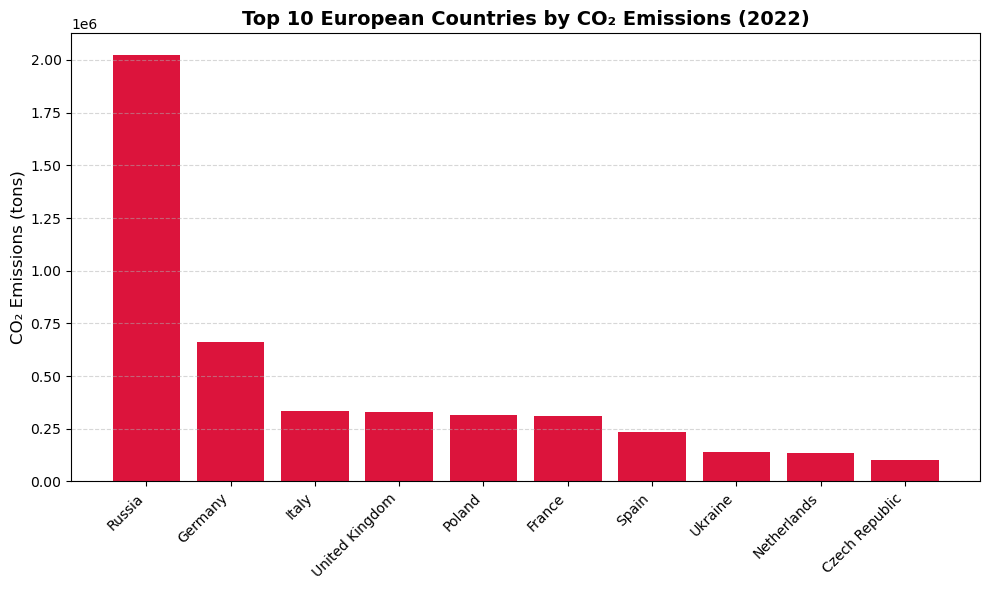

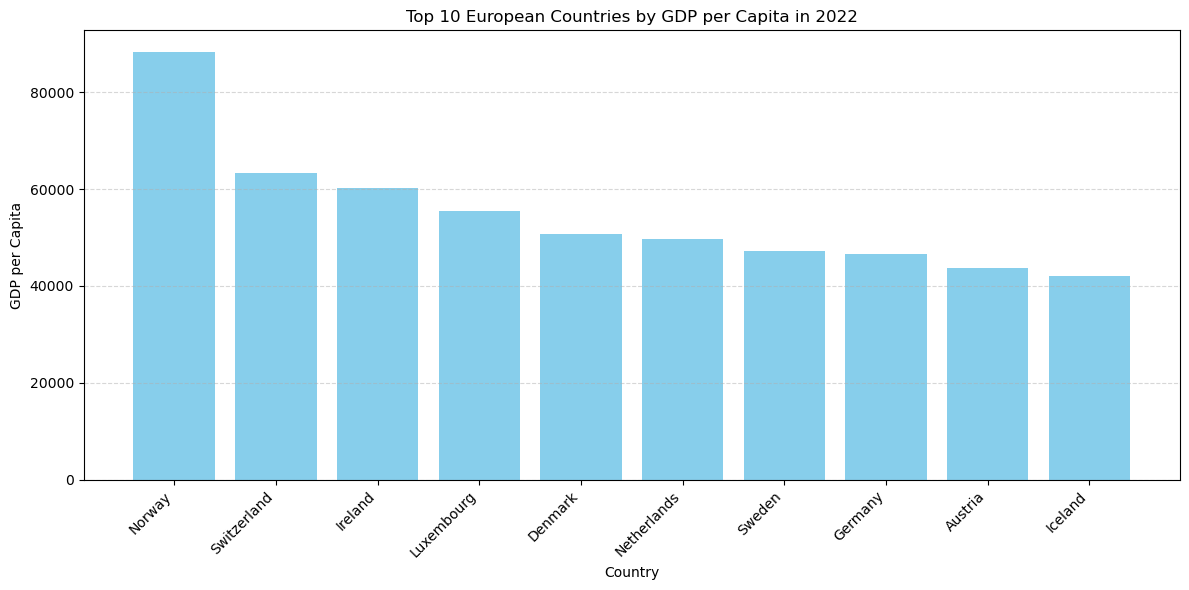

In [5]:
year = '2022'
top10_co2 = (
    df_co2_europe[['Name', year]]
    .sort_values(by=year, ascending=False)
    .head(10)
)

# Bar graf
plt.figure(figsize=(10,6))
plt.bar(top10_co2['Name'], top10_co2[year], color='crimson')
plt.ylabel('CO₂ Emissions (tons)', fontsize=12)
plt.title(f'Top 10 European Countries by CO₂ Emissions ({year})', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

df_gdp_europe.columns = df_gdp_europe.columns.str.strip()

df_2022 = df_gdp_europe[df_gdp_europe['Year'] == 2022]

# Drop rows with missing GDP per capita
df_2022 = df_2022.dropna(subset=['GDP per capita'])

# Convert GDP per capita to numeric if needed
df_2022['GDP per capita'] = pd.to_numeric(df_2022['GDP per capita'], errors='coerce')

# Sort and select top 10 countries by GDP per capita
top10_gdp = df_2022.sort_values(by='GDP per capita', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12,6))
plt.bar(top10_gdp['Entity'], top10_gdp['GDP per capita'], color='skyblue')
plt.title('Top 10 European Countries by GDP per Capita in 2022')
plt.xlabel('Country')
plt.ylabel('GDP per Capita')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

We can already see by the 2 graphs, that GDP doesn't really correlate with higher CO2 emissions. From top 10 countries with biggest GDP per capita, only 2 are in the top 10 CO2 European country emittors.

The next graph shows how the average of European C02 emission per capita and whole European GDP per capita (in this case it's all 51 countries GDP per year combined) changes throughout the years from 1970 to 2020.

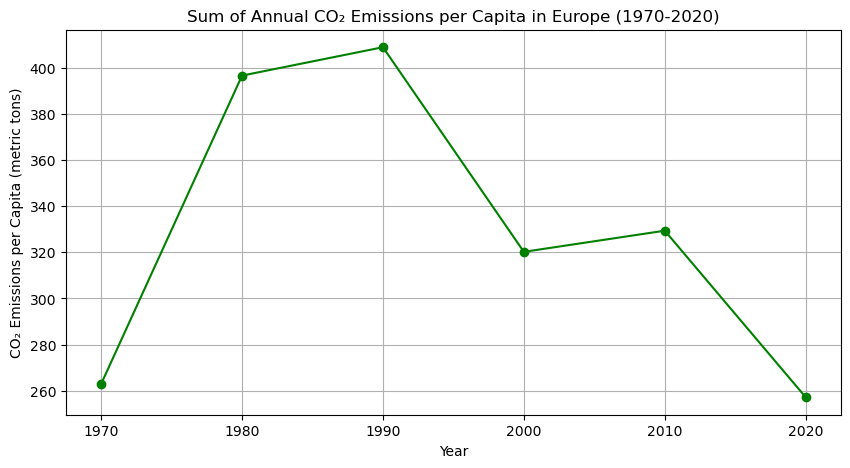

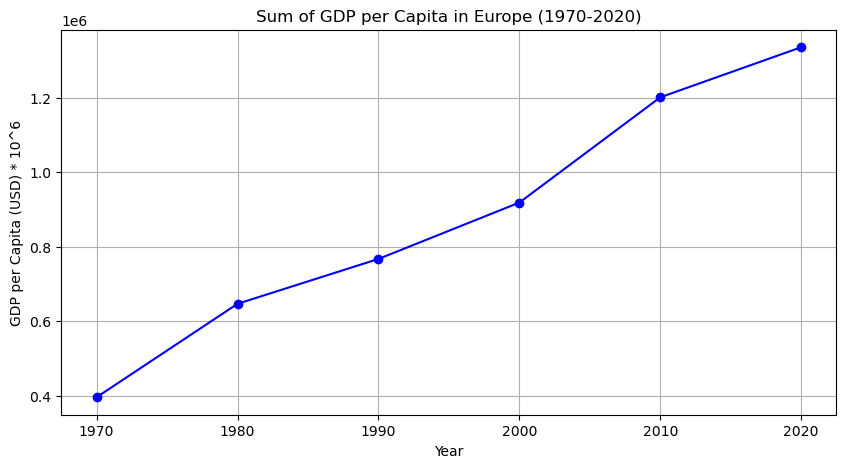

In [6]:
df_filtered = df_gdp_europe[(df_gdp_europe['Year'] >= 1970) & (df_gdp_europe['Year'] <= 2023)].copy()

# columns to numbers, avoid errors
df_filtered['Annual CO₂ emissions (per capita)'] = pd.to_numeric(df_filtered['Annual CO₂ emissions (per capita)'], errors='coerce')
df_filtered['GDP per capita'] = pd.to_numeric(df_filtered['GDP per capita'], errors='coerce')

# Drop rows with missing values
df_filtered = df_filtered.dropna(subset=['Annual CO₂ emissions (per capita)', 'GDP per capita'])

# Group by year and sum values
annual_co2_sum = df_filtered.groupby('Year')['Annual CO₂ emissions (per capita)'].sum()
annual_gdp_sum = df_filtered.groupby('Year')['GDP per capita'].sum()

# every 10 years
years_to_plot = list(range(1970, 2023, 10))
co2_10yr = annual_co2_sum.loc[years_to_plot]
gdp_10yr = annual_gdp_sum.loc[years_to_plot]

# co2 per capita sum
plt.figure(figsize=(10, 5))
plt.plot(co2_10yr.index, co2_10yr.values, marker='o', color='green')
plt.title('Sum of Annual CO₂ Emissions per Capita in Europe (1970-2020)')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions per Capita (metric tons)')
plt.grid(True)
plt.show()

# gdp per capita sum
plt.figure(figsize=(10, 5))
plt.plot(gdp_10yr.index, gdp_10yr.values, marker='o', color='blue')
plt.title('Sum of GDP per Capita in Europe (1970-2020)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (USD) * 10^6')
plt.grid(True)
plt.show()

While GDP continues to rise, CO₂ emissions per capita are decreasing. Although economic growth alone doesn’t fully explain this decline, increased wealth often leads to investments in advanced technologies that improve energy efficiency and promote cleaner production methods, contributing to lower emissions.

Next there are 2 maps of Europe. First one shows CO2 emissions per capita for the year 2022 and the second one shows GDP per capita for the year 2022. 

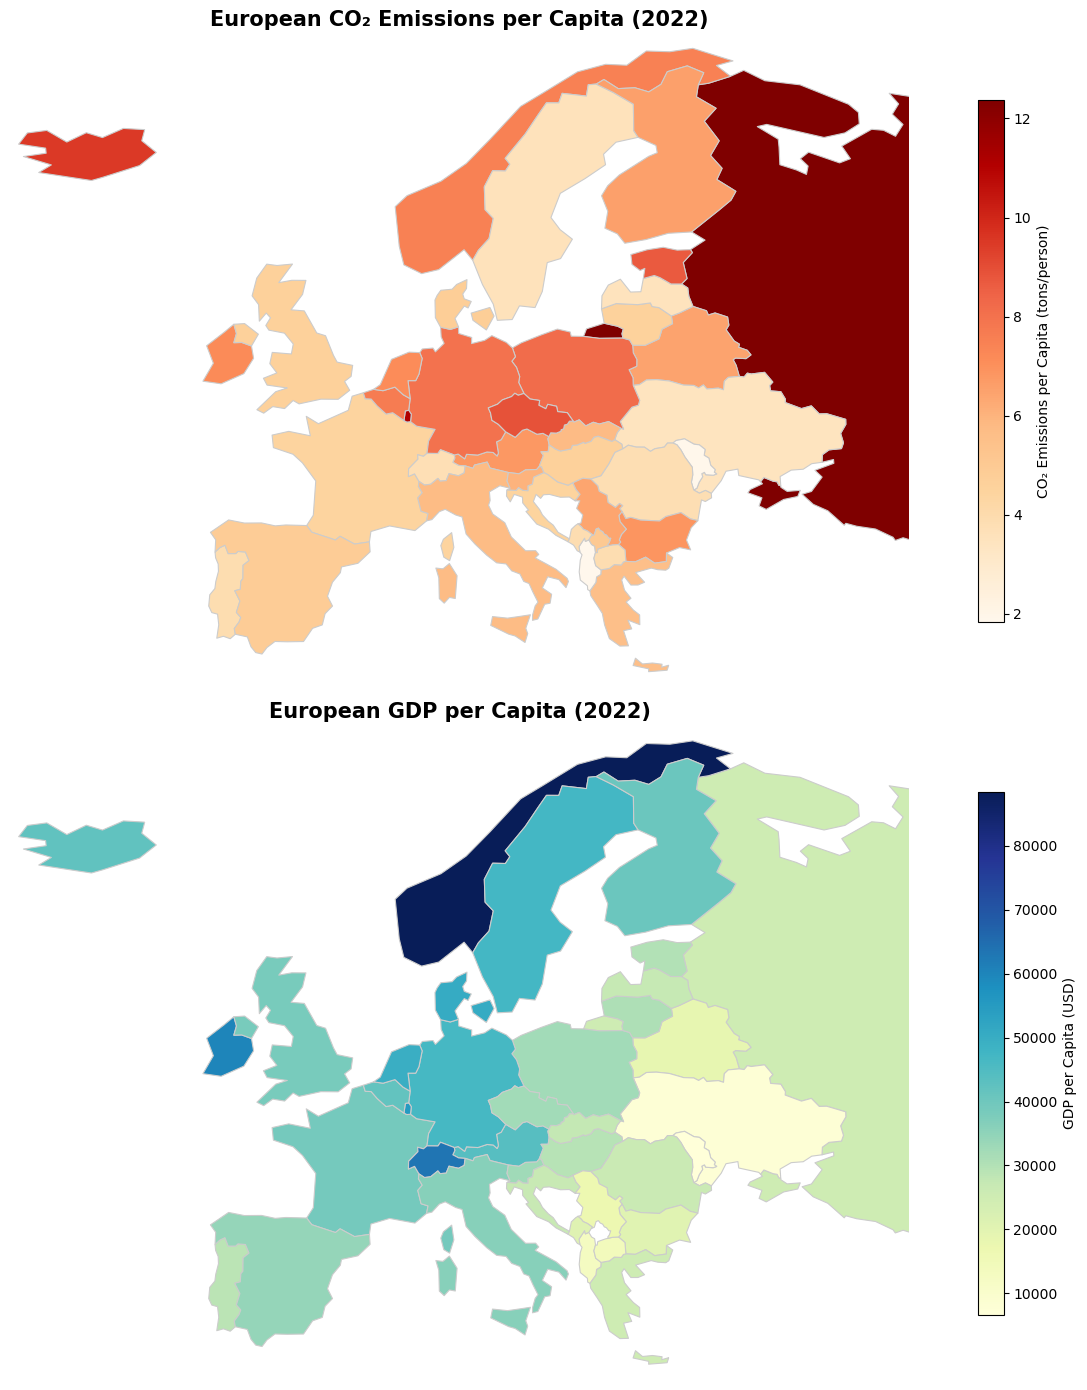

In [7]:
df_2022 = df_gdp_europe[df_gdp_europe['Year'] == 2022].copy()
df_2022 = df_2022.rename(columns={
    'Entity': 'Country',
    'Annual CO₂ emissions (per capita)': 'CO2_per_capita',
    'GDP per capita': 'GDP_per_capita'
})

df_2022['Country'] = df_2022['Country'].replace({'Czech Republic': 'Czechia'})

map_df = world.merge(df_2022, left_on='NAME', right_on='Country', how='inner')

# EU filter
map_df = map_df[map_df['CONTINENT'] == 'Europe']

minx, miny, maxx, maxy = -25, 34, 45, 72

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

map_df.plot(
    column='CO2_per_capita',
    cmap='OrRd',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=axes[0],
    legend_kwds={'label': "CO₂ Emissions per Capita (tons/person)", 'shrink': 0.8, 'aspect': 20}
)
axes[0].set_xlim(minx, maxx)
axes[0].set_ylim(miny, maxy)
axes[0].set_title('European CO₂ Emissions per Capita (2022)', fontsize=15, weight='bold')
axes[0].axis('off')

map_df.plot(
    column='GDP_per_capita',
    cmap='YlGnBu',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=axes[1],
    legend_kwds={'label': "GDP per Capita (USD)", 'shrink': 0.8, 'aspect': 20}
)
axes[1].set_xlim(minx, maxx)
axes[1].set_ylim(miny, maxy)
axes[1].set_title('European GDP per Capita (2022)', fontsize=15, weight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

The maps of European CO₂ emissions per capita and GDP per capita reveal intriguing contrasts in how wealth and environmental impact relate across different countries.

Russia stands out with relatively high CO₂ emissions per capita despite having a moderate GDP per capita. This suggests an economy with energy-intensive industries and possibly less efficient or more fossil-fuel-reliant energy consumption relative to its wealth.

In stark contrast, Sweden demonstrates the opposite pattern: it has a high GDP per capita coupled with low CO₂ emissions per capita. This indicates successful decoupling of economic growth from carbon emissions, likely driven by investments in clean energy, energy efficiency, and stringent environmental policies.

Countries like Germany exhibit a pattern of being high in both GDP and emissions per capita, reflecting a large industrial base combined with strong economic output.

Meanwhile, Switzerland is notable for its high GDP per capita paired with relatively low CO₂ emissions per capita, showing a wealthy nation with effective environmental management and clean technologies.

These variations highlight that wealth alone does not determine emissions; energy sources, industrial structures, policies, and technologies all play critical roles in shaping a country’s environmental footprint.

------------
With all this gathered information, lastly we will do a visualization in which we will express average CO₂ emitted per dollar for every European country. 

In [8]:
df_gdp_europe = df_gdp_europe[df_gdp_europe['Year'] >= 1970]

In [9]:
df_gdp_europe = df_gdp_europe[df_gdp_europe['Year'] >= 1970]

gdp_avg = df_gdp_europe.groupby(['Code', 'Entity']).agg({
    'GDP per capita': 'mean',
    'Population (historical)': 'mean'
}).dropna()

gdp_avg['avg_total_gdp'] = gdp_avg['GDP per capita'] * gdp_avg['Population (historical)']
gdp_avg = gdp_avg.reset_index() 


co2_cols = df_co2_europe.columns[df_co2_europe.columns.str.fullmatch(r'\d{4}')]  # only year columns
df_co2_europe['avg_total_co2'] = df_co2_europe[co2_cols].mean(axis=1)
co2_avg = df_co2_europe[['Country_code', 'Name', 'avg_total_co2']]

# merge both dataframes in one
combined_df = pd.merge(
    gdp_avg,
    co2_avg,
    left_on='Code',
    right_on='Country_code',
    how='inner'
)

# Calculate CO₂ per dollar and per million dollars
combined_df['co2_per_dollar'] = combined_df['avg_total_co2'] / combined_df['avg_total_gdp']
combined_df['co2_per_million_dollars'] = combined_df['co2_per_dollar'] * 1_000_000

# clean up the dataframe
result_df = combined_df[['Entity', 'Code', 'avg_total_co2', 'avg_total_gdp', 'co2_per_dollar', 'co2_per_million_dollars']]

# sort by CO2 per million dollars
result_df_worst = result_df.sort_values(by='co2_per_million_dollars', ascending=False)
result_df_best = result_df.sort_values(by='co2_per_million_dollars', ascending=True)

In the above cell we've prepared the needed data that we will use to plot the top 10 countries with most CO2 emissions per 1,000,000\\$ **result_df_worst** and the top 10 countries that emit the least CO2 per 1,000,000\\$ **result_df_best**.

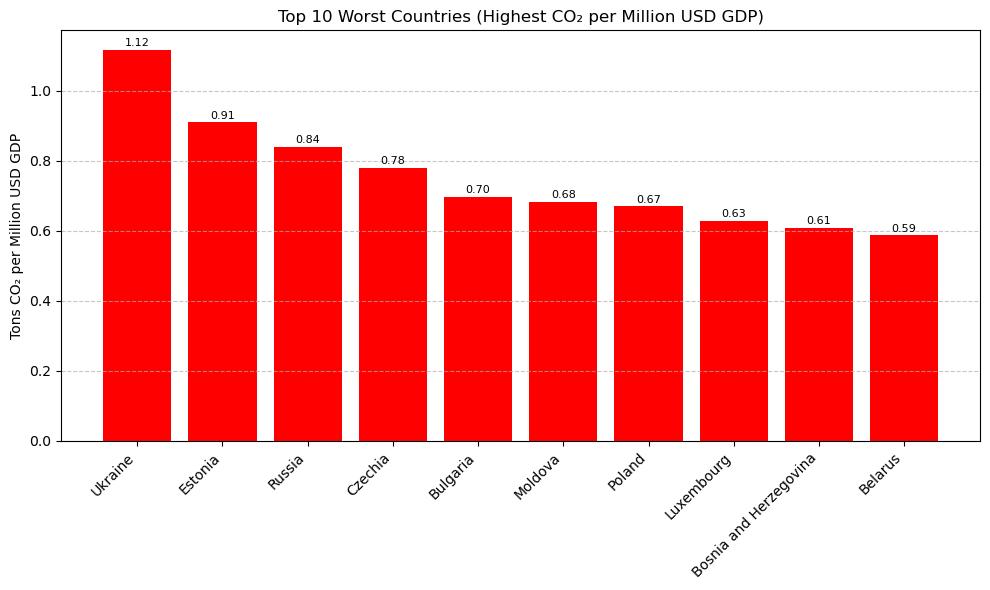

,Entity,Code,avg_total_co2,avg_total_gdp,co2_per_dollar,co2_per_million_dollars
37,Ukraine,UKR,4.556760e+05,4.078200e+11,1.117346e-06,1.117346
12,Estonia,EST,2.540454e+04,2.790704e+10,9.103274e-07,0.910327
33,Russia,RUS,1.826988e+06,2.172444e+12,8.409828e-07,0.840983
8,Czechia,CZE,1.477531e+05,1.892524e+11,7.807196e-07,0.780720
3,Bulgaria,BGR,6.465563e+04,9.269879e+10,6.974809e-07,0.697481
25,Moldova,MDA,1.651846e+04,2.414910e+10,6.840197e-07,0.684020
30,Poland,POL,3.590356e+05,5.352105e+11,6.708307e-07,0.670831
23,Luxembourg,LUX,1.150084e+04,1.828099e+10,6.291147e-07,0.629115
4,Bosnia and Herzegovina,BIH,1.718735e+04,2.820570e+10,6.093573e-07,0.609357
5,Belarus,BLR,7.357640e+04,1.250869e+11,5.882022e-07,0.588202


In [10]:
# === WORST COUNTRIES ===
plt.figure(figsize=(10, 6))
plt.bar(result_df_worst['Entity'].head(10), result_df_worst['co2_per_million_dollars'].head(10), color='red')
plt.title('Top 10 Worst Countries (Highest CO₂ per Million USD GDP)')
plt.ylabel('Tons CO₂ per Million USD GDP')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# value labels
for i, val in enumerate(result_df_worst['co2_per_million_dollars'].head(10)):
    plt.text(i, val + 0.01, f"{val:.2f}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# print out the countries
result_df_worst.head(10)

These countries **emit the most CO2 per million dollars of GDP** in Europe, as shown in the above chart.

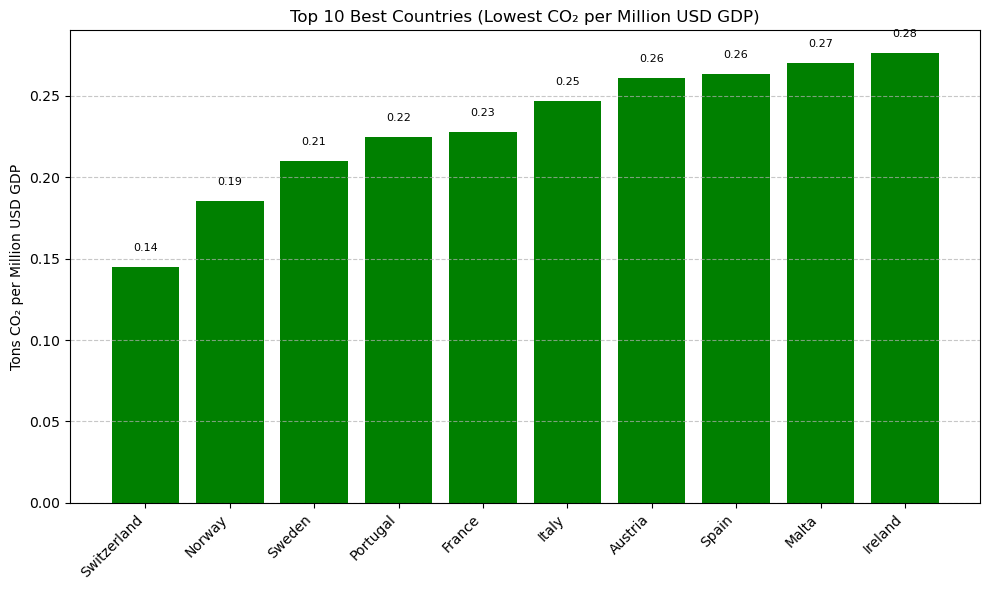

,Entity,Code,avg_total_co2,avg_total_gdp,co2_per_dollar,co2_per_million_dollars
6,Switzerland,CHE,43143.369887,2.978092e+11,1.448692e-07,0.144869
29,Norway,NOR,41120.565096,2.221205e+11,1.851273e-07,0.185127
36,Sweden,SWE,60758.719384,2.899259e+11,2.095664e-07,0.209566
31,Portugal,PRT,43517.192033,1.937173e+11,2.246428e-07,0.224643
14,France,FRA,402649.240376,1.770532e+12,2.274171e-07,0.227417
21,Italy,ITA,396935.684039,1.608231e+12,2.468151e-07,0.246815
1,Austria,AUT,64739.368940,2.484916e+11,2.605294e-07,0.260529
11,Spain,ESP,249686.718333,9.488002e+11,2.631605e-07,0.263160
27,Malta,MLT,1849.878562,6.853489e+09,2.699178e-07,0.269918
19,Ireland,IRL,34173.956006,1.237046e+11,2.762546e-07,0.276255


In [11]:
# === BEST COUNTRIES ===
plt.figure(figsize=(10, 6))
plt.bar(result_df_best['Entity'].head(10), result_df_best['co2_per_million_dollars'].head(10), color='green')
plt.title('Top 10 Best Countries (Lowest CO₂ per Million USD GDP)')
plt.ylabel('Tons CO₂ per Million USD GDP')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# value labels
for i, val in enumerate(result_df_best['co2_per_million_dollars'].head(10)):
    plt.text(i, val + 0.01, f"{val:.2f}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# print out the countries
result_df_best.head(10)

These countries **emit the least CO2 per million dollars of GDP** in Europe, as shown in the above chart.

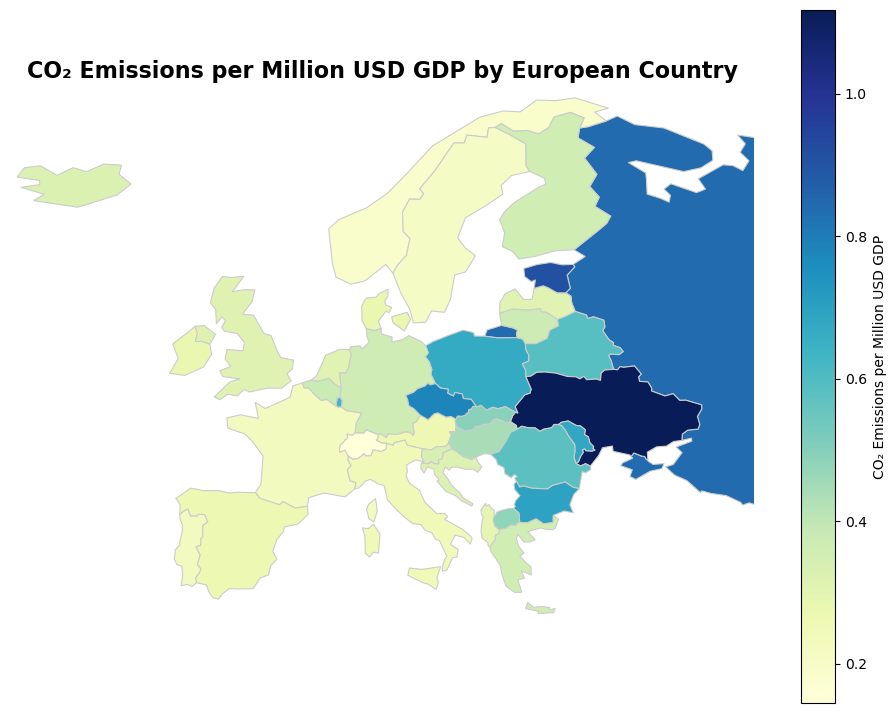

In [12]:
result_df = result_df.rename(columns={'Entity': 'Country'})
result_df['Country'] = result_df['Country'].replace({'Czech Republic': 'Czechia'})  

map_df = world.merge(result_df, left_on='NAME', right_on='Country', how='inner')

map_df = map_df[map_df['CONTINENT'] == 'Europe']

minx, miny, maxx, maxy = -25, 34, 45, 72

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

map_df.plot(
    column='co2_per_million_dollars',
    cmap='YlGnBu',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax,
    legend_kwds={'label': "CO₂ Emissions per Million USD GDP", 'shrink': 0.9}
)

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_title('CO₂ Emissions per Million USD GDP by European Country', fontsize=16, weight='bold')
ax.axis('off')

plt.show()

Using the map visualization it can be easily seen which countries emit the most CO2 per 1,000,000\\$ and which the least.

The countries with the most CO2 emissions per 1,000,000\\$ are:
 * Ukraine
 * Russia
 * Estonia
 * Czech Republic
 * Bulgaria and others.

The countries with the least CO2 emissions per 1,000,000\\$ are:
 * Switzerland
 * Norway
 * Sweden
 * France
 * Portugal and others.

The results largely aligned with our expectations: wealthier European countries tend to perform better in terms of CO₂ emissions, exhibiting lower pollution levels relative to their economic output. In contrast, less developed countries generally show higher carbon intensity, indicating greater environmental impact per unit of GDP. This pattern highlights the link between economic development and environmental efficiency, suggesting that wealthier nations have more resources and technology to reduce emissions. However, it also underscores the challenges faced by developing economies in balancing growth with sustainability.

We were particularly surprised to see Russia among the highest emitters. This is largely due to its heavy reliance on fossil fuel extraction and processing, extensive industrial activity, and energy-intensive sectors. Russia’s economy depends significantly on oil and gas drilling, which contributes substantially to its carbon footprint, making it one of the most carbon-intensive economies in Europe.